# ASTR 5490 Homework 4

In [97]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from Blackbody import SED
from scipy.integrate import quad
from MathTools import EquilTemp
from MaxwellBoltzmann import MaxwellBoltzmann

# Reload scripts I may have changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Create a blackbody spectral energy distribution for a star like the sun with $T_{eff}=5780 K$ and $1 R_{\odot}$. Include wavelengths between the X-ray (1 angs) and far infrared (100 $\mu m$) [$10^{-10}m$ to $ 10^{-4}m$]
## <center> $B_{\lambda}(T)=\frac{2hc^2}{\lambda^5}\frac{1}{\left(e^{\frac{hc}{\lambda kT}}-1\right)} \bigg\vert B_{\nu}(T) =\frac{2h\nu^3}{c^2}\frac{1}{\left(e^{\frac{h\nu}{kT}}-1\right)}$ </center>

## 1a) Plot this SED.  Integrate it over wavelength and multiply by the surface area of the sun ($4\pi R_{\odot}^2$) and another factor of $\pi$ (the angular integral over azimuthal and polar angle) and verify that you recover the luminosity of the sun: $4\pi R^2 \sigma T^4  = 2\cdot10^{33} \frac{erg}{s}$
## 1b) What fraction of the energy is emitted shorter than the peak versus longer than the peak?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Luminosity = 1.006 Lsun
24.91% of energy emitted below peak
75.03% of energy emitted above peak 

Program took 8.09 sec to run


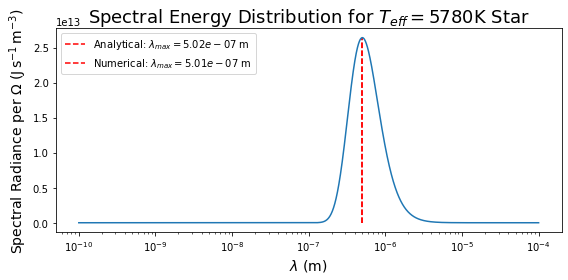

In [38]:
Sun_like = SED('wavelen')
luminosity_1a = Sun_like.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Luminosity = 1.006 Lsun
63.16% of energy emitted below peak
34.12% of energy emitted above peak 

Program took 8.17 sec to run


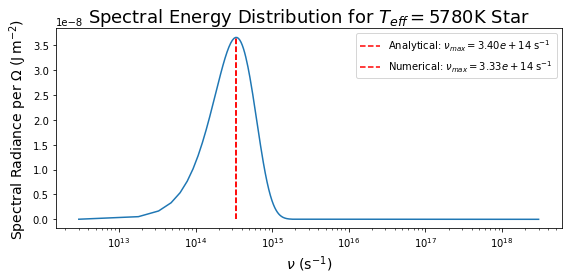

In [40]:
Sun_like_freq = SED('freq')
luminosity_1a_2 = Sun_like_freq.SEDStar(True)

### The units on the y-axis of my frequency Planck function are correct, the s and Hz in the denominatior just cancel out in the calculation with astropy units

## 1c) Spectral energy distributions in astronomy are often plotted as $\nu L_{\nu}$ on the y-axis versus $\nu$ on the x axis because the total energy scales as $\nu$ (i.e., $E=h\nu$). Make such an SED and compare it to $L_{\nu}$ on the y-axis versus $\nu$. What changes?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 7.90 sec to run


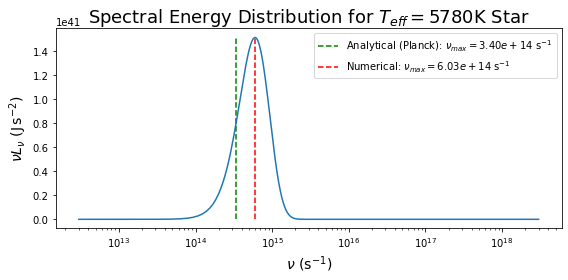

In [13]:
# Plot nu*L_nu vs. nu
plot_a_1c = SED('freq','xvar_luminos')
xdata_a,ydata_a = plot_a_1c.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 4.18 sec to run


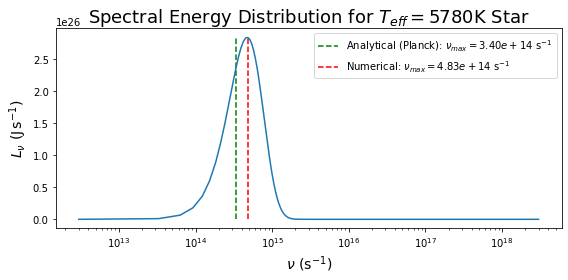

In [46]:
# Plot L_nu vs. nu
plot_b_1c = SED('freq','luminosity')
xdata_b,ydata_b = plot_b_1c.SEDStar(True)

### The plot of $\nu L_{\nu}$ is narrower arround the peak frequency than the $L_{\nu}$ plot. Also, the $\nu L_{\nu}$ plot peaks further from the peak Planck frequency than the plot of just $L_{\nu}$ does.

## 1d) Create an SED that consists of two components: a sun-like blackbody and a hot super-Jupiter with radius $R=3R_{Jup}$ at 0.05 au from the star. Plot each component separately.  Plot the contrast ratio, the ratio of $L_{\lambda}$ (or $L_{\nu}$) versus wavelength (or frequency)  to illustrate where this contrast ratio peaks.

Body Temperature = 1048.14 K


/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 7.77 sec to run


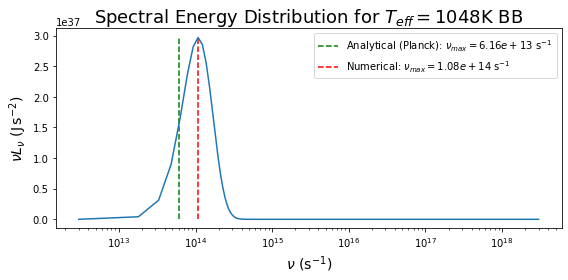

In [22]:
# Calculate temperature of hot super-Jupiter (HSJ)
T_HSJ = EquilTemp(0.5,1.0*const.R_sun,0.05*u.au,5780)
HSJ_SED = SED('freq','xvar_luminos',Teff=T_HSJ)
x_HSJ, y_HSJ = HSJ_SED.SEDStar(True)

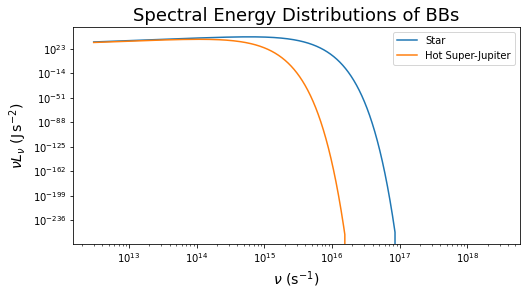

In [65]:
# Plotting SED components separately
plt.figure(figsize=(8,4))
plt.plot(xdata_a,ydata_a,label='Star') # plot SED of Sun-like star
plt.plot(x_HSJ,y_HSJ,label='Hot Super-Jupiter') # plot SED of hot super-Jupiter
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$ ({0:latex_inline})'.format(x_HSJ.unit),fontsize=14)
plt.ylabel(r'$\nu L_{{\nu}}$ ({0:latex_inline})'.format(y_HSJ.unit),fontsize=14)
plt.title('Spectral Energy Distributions of BBs',fontsize=18)
plt.legend()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


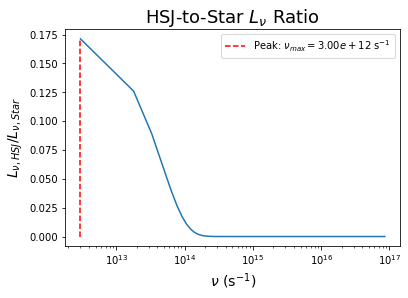

In [88]:
# Plotting contrast ratio
contrast_ratio = np.divide(y_HSJ,ydata_a)
plt.plot(x_HSJ,contrast_ratio)
plt.xscale('log')
plt.xlabel(r'$\nu$ ({0:latex_inline})'.format(x_HSJ.unit),fontsize=14)
plt.ylabel(r'$L_{\nu,HSJ}/L_{\nu,Star}$',fontsize=14)
plt.title(r'HSJ-to-Star $L_{\nu}$ Ratio',fontsize=18)

# Find where contrast ratio peaks from my calculations
peak_loc = np.nanargmax(contrast_ratio)
numerical_max = x_HSJ[peak_loc]
vlabel = r'Peak: $\nu_{{max}}={0:.2e}$ {1:latex_inline}'
plt.vlines(numerical_max.value,min(contrast_ratio),max(contrast_ratio),colors='red',\
                       linestyles='dashed',label=vlabel.format(numerical_max.value,numerical_max.unit))
plt.legend()

### The contrast ratio peaks at shorter wavelengths near the far-infrared. This agrees with our previous discussions in this class about direct imaging needing to be done in the infrared as this is where the planet is most visible in front of the star.

## 1e) Fold (that is, multiply the $F_\nu$ by the efficiency at each wavelength and integrate over the bandpass) the SED of the sun (working in frequency units) through each the magnitude difference to the approximate V-W2 color from Pecaut & Mamajek (2013, ApJS, 208, 9) for a solar type star
## <center> $\Delta m=-2.5log\left(\frac{F(Kp)}{F(4.5)}\right)$ </center>
## Do the same for the super-Jupiter to find how many magnitudes of difference there are between the host star and planet at each wavelength.

# 2) Maxwell-Boltzmann Distributions

## 2a) Plot a Maxwell-Boltzmann distribution of speeds for He in the Earth’s atmosphere.  Integrate this distribution between the escape speed for Earth and v=infinity to find what fraction of He atoms at any given time have speeds greater than escape velocity.  Do the same for molecular nitrogen and compare fractions

In [ ]:
# Plot MB dist. for He at T=273K
He_dist = 

## 2b) Do the same thing for a hot T=2000 K Jupiter-sized planet, considering both atomic He and molecular CO.